In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl

# Loading the dataset

In [2]:
# Reading file creditcard (1).csv using pd.read_csv and here df is dataframe

df=pd.read_csv('creditcard (1).csv')
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [3]:
# Display the first five rows of the dataset to understand its structure
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Display the last five rows of the dataset to understand its structure
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Checking if data contain any null value in it.

In [5]:
#Check some information of this data 
#Here info shows that data have no missing values in it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#handling missing values
#Data has no null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Class Distribution of legit and fraud transaction

In [7]:
#distribution of legit and fraud transaction
# 0----- Normal transact
# 1------ Fraud transct
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Separate data for analysis

In [9]:
legit=df[df.Class==0]
fraud=df[df.Class==1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
#statistical measure
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Comparing values for both transaction 

In [12]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# under sampling build sample dataset from original one containing similiar distribution or normal and fraud transact

In [13]:
legit_sample=legit.sample(n=492)

# concat two dataframe

In [14]:
#created a new data set named new_dataset
new_dataset=pd.concat((legit_sample,fraud),axis=0)

In [15]:
#Reading first five rows 
new_dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
214502,139701.0,-1.097223,1.332462,0.541714,3.038796,1.143325,0.293018,0.548498,0.434666,-1.866547,...,0.386528,1.045495,0.001779,0.586965,0.176431,0.265740,-0.088409,0.058030,10.59,0
119152,75353.0,-3.001758,-1.358514,2.195766,2.134909,1.445431,-0.816077,-1.103841,0.765117,-0.857802,...,0.423650,0.205186,-0.323887,-0.068575,0.513217,0.024699,-0.031126,-0.378475,41.15,0
110038,71655.0,-0.937417,0.992635,1.262978,0.427552,-0.013150,0.038570,0.392400,0.381605,-0.628967,...,-0.144640,-0.449129,-0.237983,-0.396184,0.461730,0.451738,-0.095597,-0.016523,45.39,0
5399,5354.0,1.188792,0.322740,0.526112,0.938368,-0.392623,-0.774120,-0.167010,-0.089583,1.497778,...,-0.403673,-0.954500,0.225663,0.261762,0.029886,0.069707,-0.042155,0.021684,3.59,0
38313,39338.0,1.338000,-0.145231,0.225296,-0.243380,-0.503209,-0.582903,-0.310578,-0.040488,0.648745,...,-0.202864,-0.633245,0.007131,-0.440508,0.184659,0.961128,-0.080522,-0.001666,3.84,0


In [16]:
#Reading last five rows
new_dataset.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


# Calculate the new_dataset value count for legit and fraud transactions 

In [17]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [18]:
#It is still showing large difference between mean values of legit and fraud.Next let's split data into feature
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94000.128049,-0.030976,0.021270,-0.020817,-0.061101,0.037333,0.030745,-0.003501,0.040588,0.013063,...,0.008790,0.008313,0.027219,-0.028969,-0.03336,-0.033844,0.001897,0.020574,0.039932,86.622154
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


# splitting data into features

In [19]:
#By splitting data into features and variables we come up with two Xand Y where X are features and Y is variable simply containing class data i.e, 0 and 1
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']
print(X)
print(Y)

            Time        V1        V2        V3        V4        V5        V6  \
214502  139701.0 -1.097223  1.332462  0.541714  3.038796  1.143325  0.293018   
119152   75353.0 -3.001758 -1.358514  2.195766  2.134909  1.445431 -0.816077   
110038   71655.0 -0.937417  0.992635  1.262978  0.427552 -0.013150  0.038570   
5399      5354.0  1.188792  0.322740  0.526112  0.938368 -0.392623 -0.774120   
38313    39338.0  1.338000 -0.145231  0.225296 -0.243380 -0.503209 -0.582903   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [20]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [21]:
X_scaled

array([[ 1.08649654e+00,  2.37175141e-01, -1.33645639e-01, ...,
        -1.78453236e-01,  5.00969258e-04, -4.05783902e-01],
       [-2.49585557e-01, -1.09163472e-01, -8.67506068e-01, ...,
        -1.22892283e-01, -9.48986001e-01, -2.73617354e-01],
       [-3.26368543e-01,  2.66235713e-01, -2.26320285e-01, ...,
        -1.85425246e-01, -1.61666334e-01, -2.55280110e-01],
       ...,
       [ 1.70213082e+00,  3.13748275e-01, -1.89850378e-01, ...,
         2.80830340e-01,  2.97049934e-01, -1.14723409e-01],
       [ 1.71490030e+00, -1.29543954e-01, -3.37251526e-01, ...,
         7.65576367e-01, -6.77575369e-01,  6.07997528e-01],
       [ 1.72283191e+00,  7.98944028e-01, -4.53805278e-01, ...,
        -8.98037410e-02, -1.59025484e-01, -2.67649100e-01]])

## How does Gaussian Naive Bayes handle continuous features?

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution. 

For example, using the Gaussian Distribution, suppose the training data contain a continuous attribute, x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let  μ<sub>c</sub> be the mean of the values in x associated with class c, and let  σ<sup>2</sup><sub>c</sub> be the variance of the values in x associated with class c. Then, the probability distribution of some value given a class, p(x=v|c), can be computed by plugging v into the equation for a Normal distribution parameterized by μ<sub>c</sub> and  σ<sup>2</sup><sub>c</sub>. That is:

$$p(x=v|c)=\frac{1}{\sqrt{2\pi\sigma^2_c}}\,e^{ -\frac{(v-\mu_c)^2}{2\sigma^2_c} }$$


# Naive Bayes model training steps

In [24]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
#from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# from statsmodels.stats.outliers_influence import variance_inflation_factor 
sns.set()

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y, test_size= 0.20, random_state = 2)

In [31]:
# Using Gaussian model
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [32]:
y_pred = model.predict(x_test)

# Checking accuracy of model based on pred.

In [33]:
print(accuracy_score(y_test, y_pred))

0.9187817258883249


# Confusion Matrix

In [34]:
mat_rix = confusion_matrix(y_test,y_pred)
mat_rix

array([[91,  4],
       [12, 90]], dtype=int64)

# Sensitivity of model

In [37]:
Sensitivity = true_positive/(true_positive+false_negative)
Sensitivity

0.883495145631068

# Precision of model

In [38]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9578947368421052

# Specificity

In [39]:
Specificity = true_negative/(true_negative + false_positive)
Specificity

0.9574468085106383

# Area Under Curve

In [40]:
A_U_C= roc_auc_score(y_test, y_pred)
A_U_C

0.9201238390092878

# ROC curve Plot

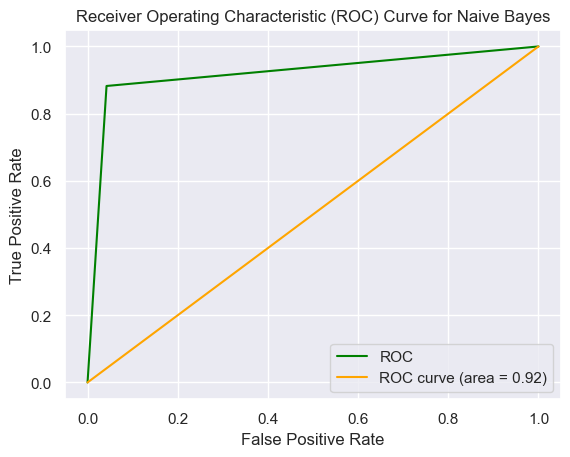

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='orange', linestyle='-',label='ROC curve (area = %0.2f)' % A_U_C)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [ ]:
# F1 Score

In [43]:
F1Score = 2*( Sensitivity* Precision) / (Sensitivity + Precision)
F1Score

0.9191919191919192

# KFold Cross- Validation on Credit card details

In [44]:
from sklearn.model_selection import KFold

In [45]:
df1 = pd.read_csv("creditcard (1).csv")
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [47]:
#data preprocessing
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df1["Class"] = label.fit_transform(df1["Class"])

In [48]:
df1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [49]:
# Split the data into features and target
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [50]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [51]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

# Splitting data for K-Fold

In [52]:
kfold = KFold(n_splits=11, shuffle=True, random_state=0)

In [53]:
accuracy_scores = []

In [54]:
#Iterate over every folds and store the accuracy of the folds into a list
for train_index, test_index in kfold.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = GaussianNB()
    model.fit(X_train, y_train)
      
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)

# Mean Accuracy Score

In [55]:
mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy score:", mean_accuracy*100)

Mean accuracy score: 99.29039651377252


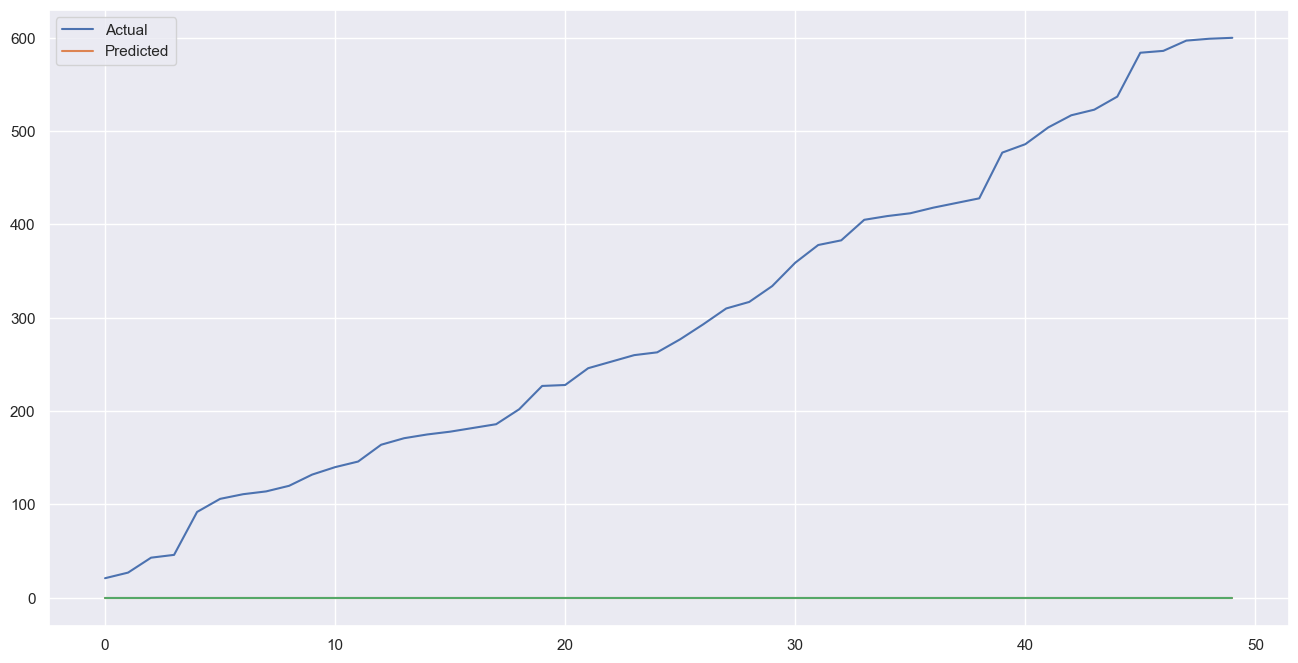

In [59]:
#visualization:
test = pd.DataFrame({'Pred_values':y_pred,'Actual':y_test})
fig=plt.figure(figsize=(16,8))
test = test.reset_index()
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

# Threshold values affect on naive bayes performance.

In [61]:
df2 = pd.read_csv('creditcard (1).csv')

#first 5 rows of the dataset
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve, classification_report

# Step 2: Preprocess the Data
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

#Training Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = nb.predict_proba(X_test)[:, 1]

#Evaluate Performance with Different Thresholds
# Calculate precision-recall pairs for different thresholds
precision, sensitivity, thresholds = precision_recall_curve(y_test, y_prob)

# Convert precision-recall to a DataFrame for easier inspection
performance_df = pd.DataFrame({'Threshold': thresholds, 'Precision': precision[:-1], 'Sensitivity': sensitivity[:-1]})

# Display the performance DataFrame
performance_df.head()

# Example classification report at a specific threshold (e.g., 0.5)
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)
report = classification_report(y_test, y_pred)
print(f"Classification Report at Threshold {threshold}:\n", report)

Classification Report at Threshold 0.5:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.13      0.63      0.22       147

    accuracy                           0.99     85443
   macro avg       0.57      0.81      0.61     85443
weighted avg       1.00      0.99      0.99     85443



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve, classification_report

# Step 2: Preprocess the Data
X = df.iloc[:, :-1]  # Features: all columns except the last one
y = df.iloc[:, -1]   # Target: the last column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = nb.predict_proba(X_test)[:, 1]

# Step 4: Evaluate Performance with Different Thresholds
# Calculate precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Convert precision-recall to a DataFrame for easier inspection
performance_df = pd.DataFrame({'Threshold': thresholds, 'Precision': precision[:-1], 'Recall': recall[:-1]})

# Example classification report at a specific threshold
threshold = 0.8
y_pred = (y_prob >= threshold).astype(int)
report = classification_report(y_test, y_pred)

performance_df.head(), report

(      Threshold  Precision  Recall
 0  5.112801e-14   0.001592     1.0
 1  5.603891e-14   0.001592     1.0
 2  5.948906e-14   0.001592     1.0
 3  6.045217e-14   0.001592     1.0
 4  6.112508e-14   0.001592     1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00     85307\n           1       0.15      0.65      0.25       136\n\n    accuracy                           0.99     85443\n   macro avg       0.58      0.82      0.62     85443\nweighted avg       1.00      0.99      1.00     85443\n')